In [1]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
f_plane=open("C:/Users/student/Downloads/Python_JP/planesnet/planesnet/planesnet.json")
f_plane

<_io.TextIOWrapper name='C:/Users/student/Downloads/Python_JP/planesnet/planesnet/planesnet.json' mode='r' encoding='cp949'>

In [3]:
plane_dataset=json.load(f_plane)
f_plane.close()

In [6]:
plane_dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [8]:
plane_x=np.array(plane_dataset['data']).astype('uint8')
plane_y=np.array(plane_dataset['labels']).astype('uint8')
#int8, 16, 32, 64, uint8, 16, 32, 64
#int8:8비트로 정수를 표현(-128~127 부호1비트빼고 7비트)

In [11]:
plane_x.shape #20,20,3
#plane_y.shape
plane_x=plane_x.reshape([-1,3,20,20]).transpose([0,2,3,1])
plane_x.shape # 3200,20,20,3

(32000, 20, 20, 3)

In [12]:
shuffle_index=np.arange(32000)
np.random.shuffle(shuffle_index)

In [14]:
plane_x=plane_x[shuffle_index]
plane_y=plane_y[shuffle_index]

In [15]:
plane_x=plane_x/255.0

In [16]:
plane_x.nbytes #307200000 

307200000

In [17]:
plane_classes={0:'No Plane', 1:'Plane'}

In [19]:
plane_x[0].shape# 20, 20, 3

(20, 20, 3)

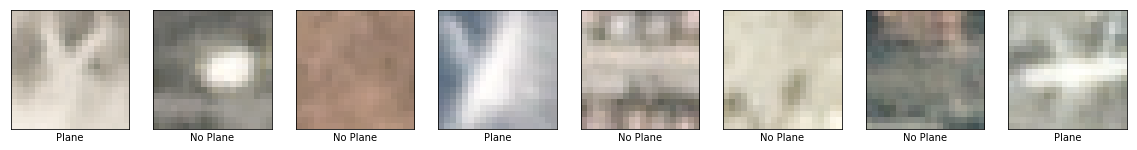

In [20]:
plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plane_x[i],cmap=plt.cm.binary)
    plt.xlabel(plane_classes[plane_y[i]])

In [21]:
plane_x_train,plane_x_test,plane_y_train,plane_y_test=
train_test_split(plane_x,plane_y,test_size=0.2)

In [38]:
def cnn_model(inputshape):
    model=tf.keras.Sequential([
        keras.layers.Conv2D(32,(5,5),input_shape=inputshape,activation='relu',padding='same'),
        keras.layers.Conv2D(64,(5,5),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        
        keras.layers.Conv2D(128,(5,5),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(2,activation='softmax')
    ])
    model.summary()
    return(model)

In [39]:
training_plane=cnn_model((20,20,3))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 20, 32)        2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 128)        

In [40]:
import os
checkpoint_path1="cp.ckpt"
checkpoint_dir1=os.path.dirname(checkpoint_path1)

In [41]:
cp_callback1=tf.keras.callbacks.ModelCheckpoint(checkpoint_path1,
                                                save_weights_only=True,verbose=1)

In [42]:
training_plane.compile(optimizer=tf.keras.optimizers.Adam(),
                       loss=tf.keras.losses.sparse_categorical_crossentropy,
                      metrics=['accuracy'])

In [43]:
import time

In [44]:
start_time_plane=time.time()
training_plane=training_plane.fit(plane_x_train,plane_y_train,
                   validation_split=0.33,epochs=30,
                   callbacks=[cp_callback1],
                   batch_size=256)

training_time_plane=time.time()-start_time_plane
"""
model.fit(...,validation_data(xVal,yVal)) - 검증데이터 따로 있는 경우
validation_split=0.33
xTrain,yTrain을 33% 분리하여 검증데이터로 사용
"""

Train on 17152 samples, validate on 8448 samples
Epoch 1/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.5473 - acc: 0.7511
Epoch 00001: saving model to cp.ckpt
17152/17152 [==============================] - 21s 1ms/sample - loss: 0.5453 - acc: 0.7522 - val_loss: 0.3583 - val_acc: 0.8142
Epoch 2/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.3593 - acc: 0.8262
Epoch 00002: saving model to cp.ckpt
17152/17152 [==============================] - 21s 1ms/sample - loss: 0.3589 - acc: 0.8264 - val_loss: 0.3145 - val_acc: 0.8630
Epoch 3/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.8956
Epoch 00003: saving model to cp.ckpt
17152/17152 [==============================] - 21s 1ms/sample - loss: 0.2478 - acc: 0.8958 - val_loss: 0.1809 - val_acc: 0.9214
Epoch 4/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.1822 - acc: 0.9275
Epoch 00004: saving model to cp.ckpt
17152/17152 [==========================

'\nmodel.fit(...,validation_data(xVal,yVal)) - 검증데이터 따로 있는 경우\nvalidation_split=0.33\nxTrain,yTrain을 33% 분리하여 검증데이터로 사용\n'

In [ ]:
training_plane.evaluate(plane_x_test,plane_y_test)
classification_plane=training_plane.predict(plane_x_test)

In [45]:
#문제 1
#loss, accuracy 그래프 작성
#x축: epochs, y축 : loss or accuracy

#문제 2
#sonar 분류
from sklearn.preprocessing import LabelEncoder

In [ ]:
1.모델
e=LabelEncoder()
e.fit(ydata)
y=e.transform(ydata)

loss='mse', opt=adam,...

과적합 발생

2.
학습셋과 테스트셋 분리
ex) 데이터 100개

70개 학습용      30개 테스트용
70개 학습 -> 모델 -> 30개 테스트

3. 모델 저장/불러오기
from keras.models import load_model
저장 : model.save("mymodel.h5")
불러오기 : model=load_model("mymodel.h5")
    
4. k-fold cross validation
5 fold 교차 검증 : 데이터를 5개로 나눔